In [1]:
#Importing the necessary libraries for operations such as plotting, matrix operations, Dataframes operations, timing etc.
from timeit import default_timer as timer
from __future__ import print_function
Start = timer() #Start time
import numpy as np #Import numpy library
import tensorflow as tf #Importing tensorflow library
import keras as ks #Impoting Keras
import os
from glob import glob #To grab path to the Dataset files in Google Drive
from matplotlib import pyplot as plt #For plotting figures
plt.style.use('ggplot')

In [2]:
 ! pip install -q kaggle
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harismahmood","key":"0c375c2a23d28d1f28d577b687085115"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d 'paultimothymooney/chest-xray-pneumonia'
! mkdir chest_xray_pneumonia
! unzip chest-xray-pneumonia.zip -d chest_xray_pneumonia

ref                                                               title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
jmmvutu/summer-products-and-sales-in-ecommerce-wish               Sales of summer clothes in E-commerce Wish        376KB  2020-08-23 15:16:46           3502  
Cornell-University/arxiv                                          arXiv Dataset                                     880MB  2020-08-27 23:07:17           2125  
agirlcoding/all-space-missions-from-1957                          All Space Missions from 1957                      101KB  2020-08-13 16:18:58           1778  
gpreda/unemployment-in-european-union                             Unemployment in European Union                    876KB  2020-08-30 09:12:18            650  
landlord/handwriting-recognition        

In [17]:
#Make separate handles for the paths of the train, test and validation sets
#You can write the path below by manually scrolling to the chest_xray folder in the files section of this page
#Right click the chest_xray folder and select copy path to paste below
Paths = "/content/chest_xray_pneumonia/chest_xray"
train = os.path.join(Paths, 'train')
test = os.path.join(Paths, 'test')
val = os.path.join(Paths, 'val')
train_NORMAL = os.path.join(train, 'NORMAL')
train_PNEUMONIA = os.path.join(train, 'PNEUMONIA')
test_NORMAL = os.path.join(test, 'NORMAL')
test_PNEUMONIA = os.path.join(test, 'PNEUMONIA')
val_NORMAL = os.path.join(val, 'NORMAL')
val_PNEUMONIA = os.path.join(val, 'PNEUMONIA')

str

In [30]:
def show_image(path):
  plt.imshow(plt.imread(path))
  plt.figure()

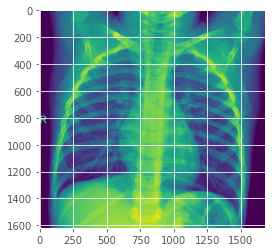

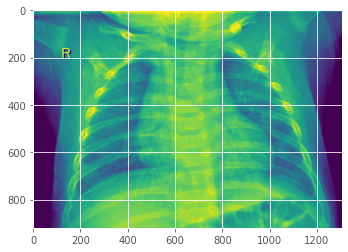

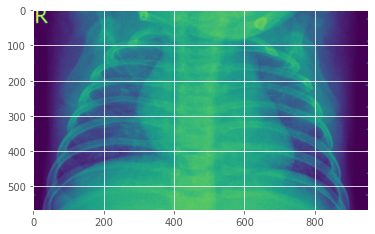

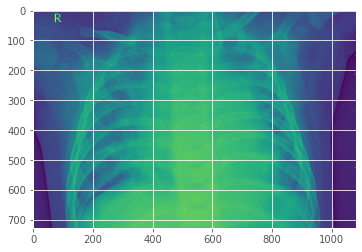

<Figure size 432x288 with 0 Axes>

In [31]:
#Visualizing the first 2 images in the Train/NORMAL/ and train/PNEUMONIA/ directory 
show_image(train_NORMAL+"/"+os.listdir(train_NORMAL)[0])
show_image(train_NORMAL+"/"+os.listdir(train_NORMAL)[1])
show_image(train_PNEUMONIA+"/"+os.listdir(train_PNEUMONIA)[0])
show_image(train_PNEUMONIA+"/"+os.listdir(train_PNEUMONIA)[1])

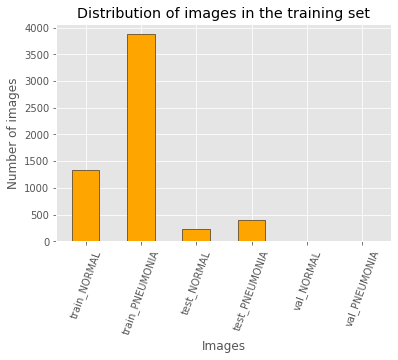

8

In [36]:
#Visualizing the dataset
x_label = "Images"
y_label = "Number of images"
folders_paths = ["train_NORMAL","train_PNEUMONIA", "test_NORMAL","test_PNEUMONIA","val_NORMAL","val_PNEUMONIA"]
folders_names = [train_NORMAL,train_PNEUMONIA, test_NORMAL,test_PNEUMONIA,val_NORMAL,val_PNEUMONIA]
folders_vals = np.array([len(os.listdir(x)) for x in folders_names])
occurances = np.array([x for x in folders_vals])
plt.bar(folders_paths, occurances, width = 0.5, color = 'orange', align = 'center', edgecolor = 'black')
plt.xticks(rotation=70)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Distribution of images in the dataset")
plt.show()

In [ ]:
from PIL import Image
from keras.preprocessing import image
#Make dictionaries for holding pixel matrices for train, test and validation sets
X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []
#Generating the training sets
for i in glob(train_NORMAL+"/*.jpeg"):
  picture = Image.open(i).convert('L')
  pic = picture.resize((150,150))
  X_train.append(image.img_to_array(pic))
#Let 0 - NORMAL
#Let 1 - PNEUMONIA
initial = len(X_train)
y_train_a = np.zeros(initial)
for i in glob(train_PNEUMONIA+"/*.jpeg"):
  picture = Image.open(i).convert('L')
  pic = picture.resize((150,150))
  X_train.append(image.img_to_array(pic))
#Let 0 - NORMAL
#Let 1 - PNEUMONIA
final = len(X_train)
y_train = np.concatenate((y_train_a, np.ones(final-initial)))
X_train = np.stack(X_train)

In [56]:
#Generating the test sets
for i in glob(test_NORMAL+"/*.jpeg"):
  picture = Image.open(i).convert('L')
  pic = picture.resize((150,150))
  X_test.append(image.img_to_array(pic))
#Let 0 - NORMAL
#Let 1 - PNEUMONIA
initial = len(X_test)
y_test_a = np.zeros(initial)
for i in glob(test_PNEUMONIA+"/*.jpeg"):
  picture = Image.open(i).convert('L')
  pic = picture.resize((150,150))
  X_test.append(image.img_to_array(pic))
#Let 0 - NORMAL
#Let 1 - PNEUMONIA
final = len(X_test)
y_test = np.concatenate((y_test_a, np.ones(final - initial)))
X_test = np.stack(X_test)

In [57]:
#Generating the validation sets
for i in glob(val_NORMAL+"/*.jpeg"):
  picture = Image.open(i).convert('L')
  pic = picture.resize((150,150))
  X_val.append(image.img_to_array(pic))
#Let 0 - NORMAL
#Let 1 - PNEUMONIA
initial = len(X_val)
y_val_a = np.zeros(initial)
for i in glob(val_PNEUMONIA+"/*.jpeg"):
  picture = Image.open(i).convert('L')
  pic = picture.resize((150,150))
  X_val.append(image.img_to_array(pic))
#Let 0 - NORMAL
#Let 1 - PNEUMONIA
final = len(X_val)
y_val = np.concatenate((y_val_a, np.ones(final - initial)))
X_val = np.stack(X_val)

In [73]:
#from sklearn.model_selection import train_test_split #For Train-Test split of dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 337)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Activation, Flatten
from tensorflow.keras import layers
import tensorflow as tf
kernel_size = 3
filter_dim = 250
hidden_layer_dim = 250
cnn = Sequential()
cnn.add(Conv2D(filters = filter_dim, kernel_size = (kernel_size, kernel_size), activation = 'relu', padding = 'same'))
cnn.add(Dropout(0.2))
cnn.add(MaxPooling2D(pool_size = (8, 8), strides = None, padding = 'valid'))
cnn.add(Dense(hidden_layer_dim))
cnn.add(Dropout(0.2))
cnn.add(Activation('relu'))
cnn.add(Flatten())
cnn.add(Dense(1))
cnn.add(Activation('softmax'))
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 8, monitor = 'loss')
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
original_model = cnn.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 10, callbacks = [early_stopping], steps_per_epoch = 163, validation_steps = 19)

Epoch 1/10
163/163 [==============================] - 503s 3s/step - loss: 0.0000e+00 - accuracy: 0.7429 - val_loss: 0.0000e+00 - val_accuracy: 0.6151
Epoch 2/10
163/163 [==============================] - 501s 3s/step - loss: 0.0000e+00 - accuracy: 0.7429 - val_loss: 0.0000e+00 - val_accuracy: 0.6151
Epoch 3/10
163/163 [==============================] - 501s 3s/step - loss: 0.0000e+00 - accuracy: 0.7429 - val_loss: 0.0000e+00 - val_accuracy: 0.6151
Epoch 4/10
163/163 [==============================] - 501s 3s/step - loss: 0.0000e+00 - accuracy: 0.7429 - val_loss: 0.0000e+00 - val_accuracy: 0.6151
Epoch 5/10
163/163 [==============================] - 501s 3s/step - loss: 0.0000e+00 - accuracy: 0.7429 - val_loss: 0.0000e+00 - val_accuracy: 0.6151
Epoch 6/10
163/163 [==============================] - 501s 3s/step - loss: 0.0000e+00 - accuracy: 0.7429 - val_loss: 0.0000e+00 - val_accuracy: 0.6151
Epoch 7/10
163/163 [==============================] - 501s 3s/step - loss: 0.0000e+00 - accura

In [74]:
def plot_confusion_matrix_self(cm, classes, title, cmap):
    import itertools
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel(ylabel = 'True label', labelpad = 25)
    plt.xlabel(xlabel = 'Predicted label', labelpad = 25)
    plt.show()

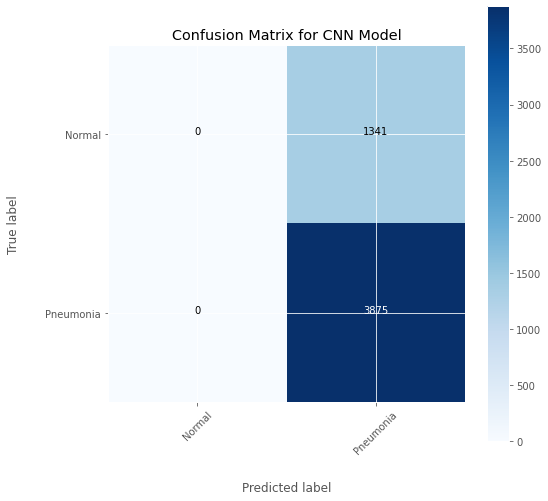

The total time to run the script is:  16305.177555331002


In [85]:
from sklearn.metrics import confusion_matrix
y_pred = cnn.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred, labels = [0. , 1.])
plot_confusion_matrix_self(cnf_matrix, classes = ["Normal" , "Pneumonia"], title = "Confusion Matrix for CNN Model", cmap = plt.cm.Blues)
plt.show()
Stop = timer() #Stop time
Total_time = Stop - Start
print("The total time to run the script is: ", Total_time,"seconds")